



## **DESICION TREE 02**

In [39]:
# Insattling the libraries and collecting the data

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [40]:
df= pd.read_csv('diabetes.csv')



## **Descriptive statistics and Visualizations**

---







In [5]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

***Observation*** : There are 9 columns in the data frame , the last column named 'Outcome' is our target varibale or dependet feature and rest of are the independent features. Moving further we are tried to prediction for our dependent feature.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


**Observation** :
- There are 768 entries in our data set

- All feature are in their pragamatic form. BMI and DiabetesPedigreeFunction have only float data type as they are containing the decimale value. So we dont need to any change for data types in feature Engeeniring , which we are going to procced further.

In [7]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


*Observation* : All columns have 768 values it means there are no any Null value in the Data set.
Column Glucose have more larger values then others.

In [8]:
print('The Unique value of Outcomes =', df['Outcome'].unique())
print('Number of Unique values in Outcome=' , df['Outcome'].value_counts())


The Unique value of Outcomes = [1 0]
Number of Unique values in Outcome= 0    500
1    268
Name: Outcome, dtype: int64


*Observation* ; There are only two possible outcomes for the feature 'Outcome'. Which idicate that the classification is Binary. And 1 means 'The person is diabetic' and 0 indates that 'person is not diabetic'. So it is now clear that non-diaberic pepole are large in number from who are ill from diabetices.

<AxesSubplot: >

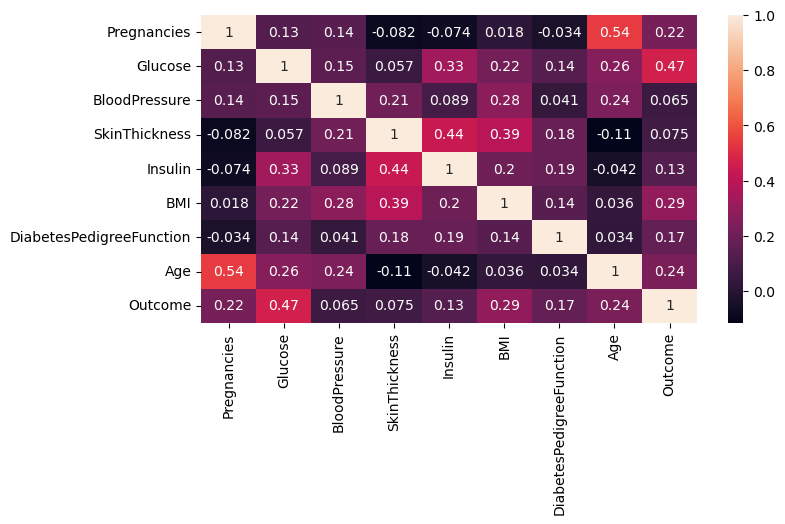

In [11]:
# Now for finding the correlation between the features we can use heatmap graph. which shown below

plt.figure(figsize= (8,4))

sns.heatmap(df.corr() , annot= True)

**Observation;**

- In most of the cases there are mainy postive correlation between the features which mean the most of the features are proportional to each other. There are some features which are negativly correalted are inversaly proportional to each other.

- Here we can see that pragnancies and SkinThickness has highly inversaly correlated with each other.

# **Cleaning missing values, Removing outliers,**


---



---



In [12]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

**Observation** ;

Here it is clearly showing thas there are no null value in the data set so we dont need to fill it.

<AxesSubplot: >

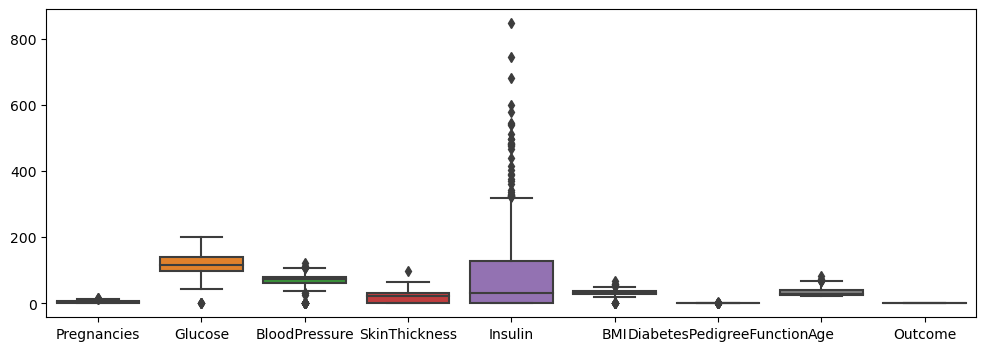

In [13]:
# For finding outliers we are going to use Boxplot technique

plt.figure(figsize=(12,4))
sns.boxplot(df)



**Observation : It is clearly show by the visulazation that in the column Insulin there are many outleirs however some of the outliers are in Skin Thickness and some other columns also.

In [14]:
#as we have seen that there are one outliear in column SkinThickness.
# So we are going to fix it by the mean of the column

df['SkinThickness'].max()

# 99 is an outliear

99

In [15]:
# 20 is the mean of the column which we get above by the describe function.
df['SkinThickness']=df['SkinThickness'].replace( 99 , 20)

In [34]:
# Detecting all outliers in Insulin

lower_quartile = df['Insulin'].quantile(0.25)
upper_quartile = df['Insulin'].quantile(0.75)

iqr = upper_quartile - lower_quartile

# Calculate upper and lower bounds
upper_bound = upper_quartile + 1.5 * iqr
lower_bound = lower_quartile - 1.5 * iqr

# Find outliers
outliers = df[(df['Insulin'] < lower_bound) | (df['Insulin'] > upper_bound)]

In [ ]:
# Replace outliers with median
median = df['Insulin'].median()
outliers['Insulin'] = median

# Check the original vs. modified data
print(df['Insulin'].head())
print(outliers['Insulin'].head())

# Split the dataset into a training set and a test set

In [60]:
# For spliting the data into train and test data we have to make first, distiniguishe the data between dependent and
# independent feature. which are x and y

x= df.iloc[:,:-1]
y= df.iloc[::,-1]

In [61]:
# Now we are going to performe train test split by sklearn lib
from sklearn.model_selection import train_test_split

In [65]:
x_train,x_test,y_train,y_test = train_test_split(x , y , test_size= 0.33 , random_state= 42)

# Use a decision tree algorithm

In [72]:
# Training our model

from sklearn.tree import DecisionTreeClassifier
clf= DecisionTreeClassifier( random_state=42)
clf.fit(x_train, y_train)

y_pred= clf.predict(x_test)
 
    
#Evaluating the model

from sklearn.metrics import accuracy_score,classification_report
accuracy= accuracy_score(y_pred, y_test)
report= classification_report (y_pred , y_test)
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(report)


Accuracy: 0.71
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.80      0.78       161
           1       0.62      0.57      0.59        93

    accuracy                           0.71       254
   macro avg       0.69      0.68      0.69       254
weighted avg       0.71      0.71      0.71       254



**cross-validation to optimize the hyperparameters and avoid overfitting.**

In [73]:
# installing libraries

from sklearn.model_selection import GridSearchCV

In [74]:
# Define hyperparameters and their possible values for grid search
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a grid search object with cross-validation
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy')

# Fit the grid search object on the training data
grid_search.fit(x_train, y_train)

# Get the best parameters from the grid search
best_params = grid_search.best_params_

# Use the best parameters to create the final model
final_model = DecisionTreeClassifier(random_state=42, **best_params)

# Fit the final model on the training data
final_model.fit(x_train, y_train)

# Make predictions on the test data
y_pred = final_model.predict(x_test)

# Evaluate the final model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Best Hyperparameters: {best_params}")
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(report)

Best Hyperparameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 10}
Accuracy: 0.69
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.78      0.77       168
           1       0.55      0.52      0.54        86

    accuracy                           0.69       254
   macro avg       0.66      0.65      0.65       254
weighted avg       0.69      0.69      0.69       254

